In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/willi/Python/Spotify_Project/Data/raw_data.csv", sep=",")

df_new = pd.read_csv("C:/Users/willi/Python/Spotify_Project/Data/new_raw_data.csv", sep=",")

Raw_data_df = pd.concat([df,df_new])

In [9]:
# Clean Other columns
Raw_data_df["mood"] = [1 if i >= 0.5 else 0 for i in Raw_data_df.valence]
Raw_data_df["liveness"] = [1 if i >= 0.8 else 0 for i in Raw_data_df.liveness]
Raw_data_df["explicit"] = [1 if i == True else 0 for i in Raw_data_df.explicit]
Raw_data_df["speechiness"] = [1 if i > 0.66 else 0 for i in Raw_data_df.speechiness]
Raw_data_df["instrumentalness"] = [1 if i > 0.5 else 0 for i in Raw_data_df.instrumentalness]

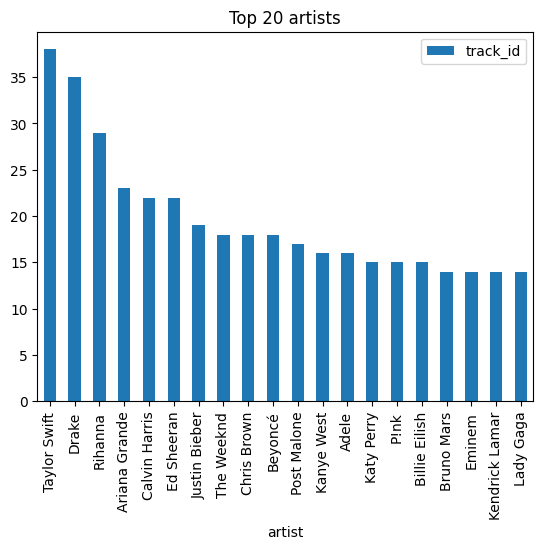

In [10]:
top_artists = Raw_data_df.pivot_table(values = "track_id",index = "artist",aggfunc = 'count').sort_values(ascending=False,by="track_id")

top_artists.head(20).plot(kind="bar")
plt.title("Top 20 artists")
plt.show();

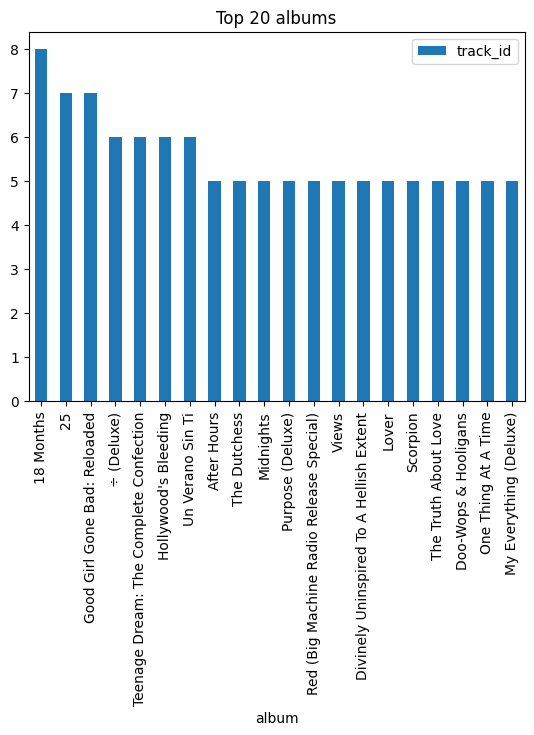

In [11]:
top_albums = Raw_data_df.pivot_table(values = "track_id",index = "album",aggfunc = 'count').sort_values(ascending=False,by="track_id")

top_albums.head(20).plot(kind="bar")
plt.title("Top 20 albums")
plt.show();

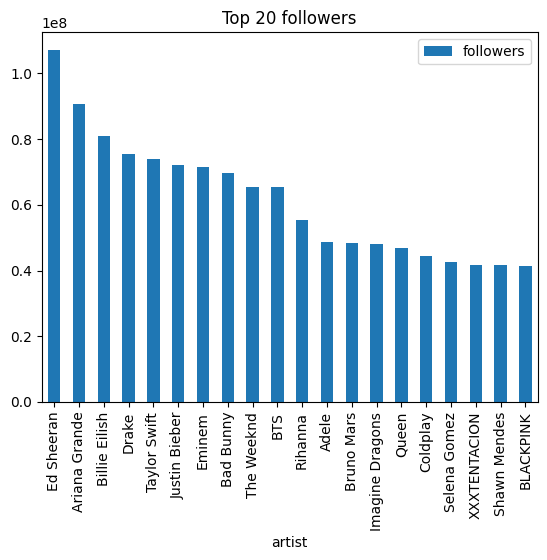

In [5]:
top_followers = Raw_data_df.pivot_table(values = "followers",index = "artist",aggfunc = 'mean').sort_values(ascending=False,by="followers")

top_followers.head(20).plot(kind="bar")
plt.title("Top 20 followers")
plt.show();

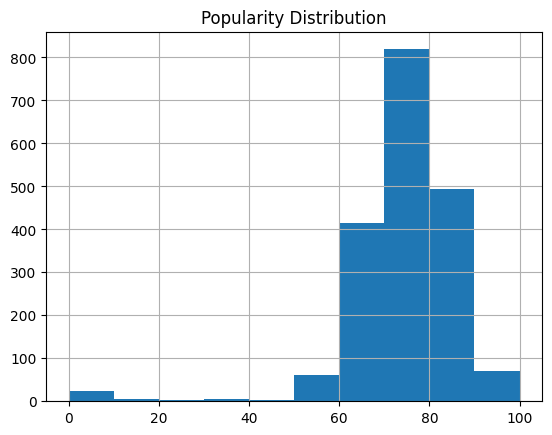

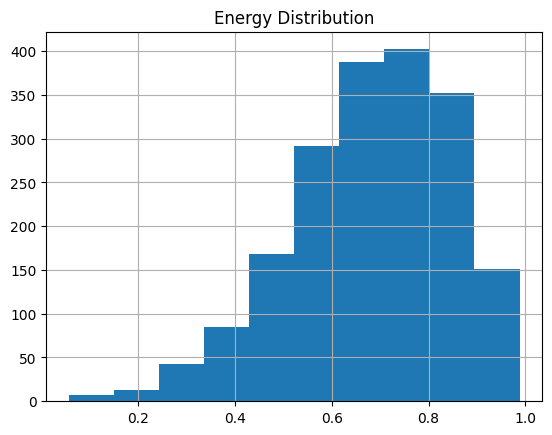

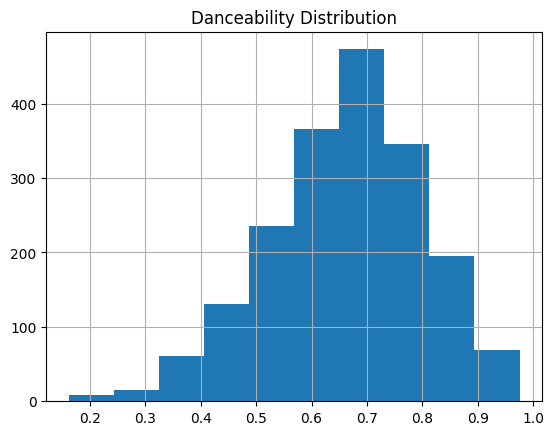

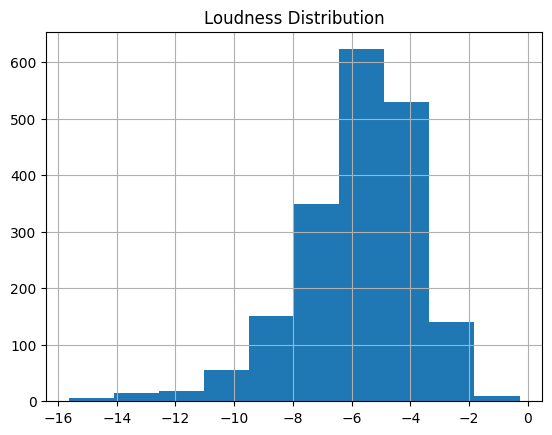

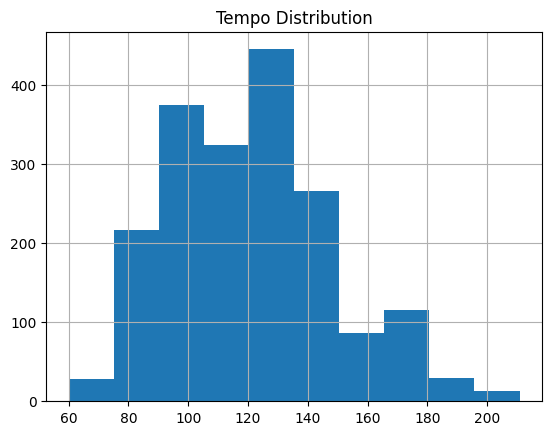

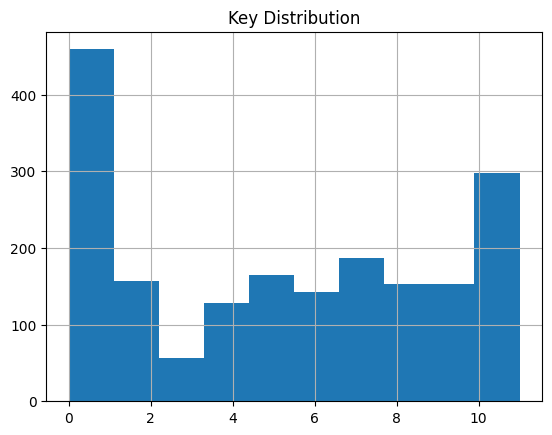

In [12]:
Raw_data_df["popularity"].hist(bins=10)
plt.title("Popularity Distribution")
plt.show();

Raw_data_df["energy"].hist(bins=10)
plt.title("Energy Distribution")
plt.show();

Raw_data_df["danceability"].hist(bins=10)
plt.title("Danceability Distribution")
plt.show();

Raw_data_df["loudness"].hist(bins=10)
plt.title("Loudness Distribution")
plt.show();

Raw_data_df["tempo"].hist(bins=10)
plt.title("Tempo Distribution")
plt.show();

Raw_data_df["key"].hist(bins=10)
plt.title("Key Distribution")
plt.show();

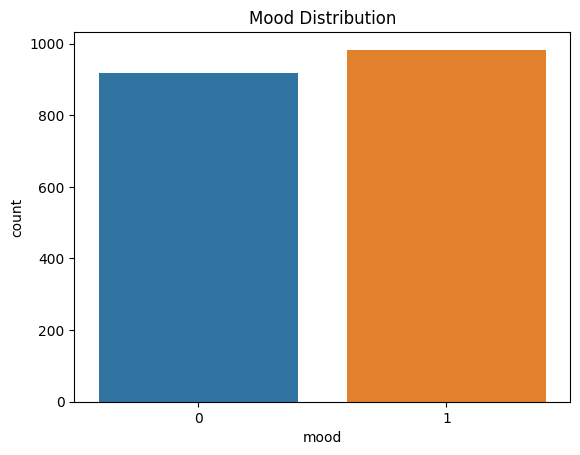

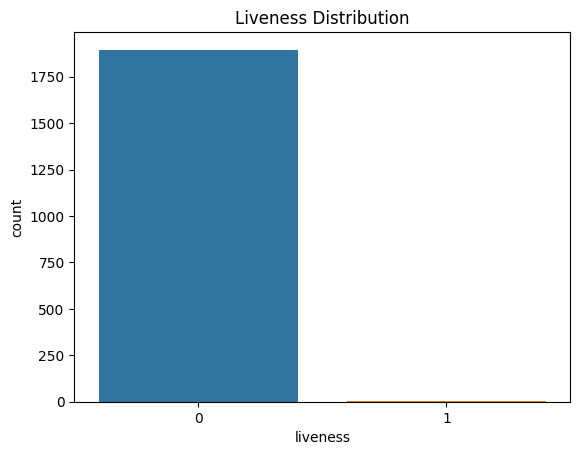

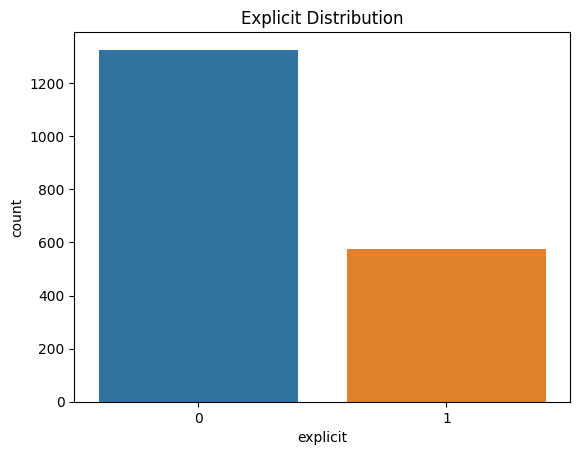

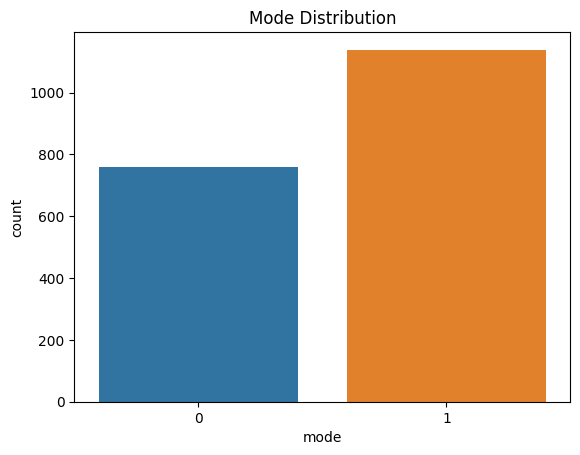

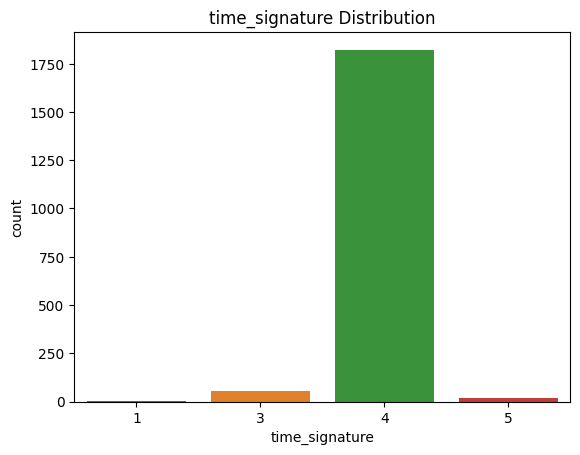

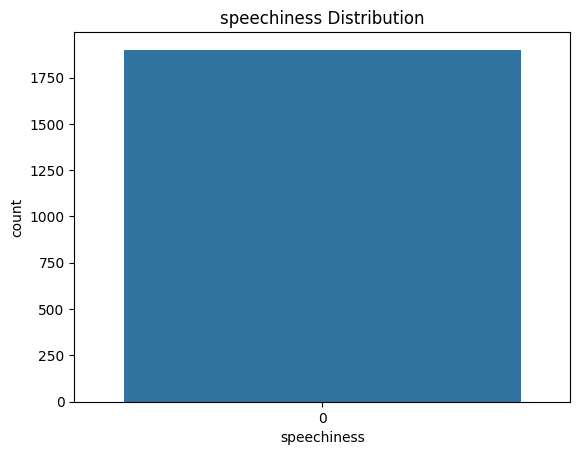

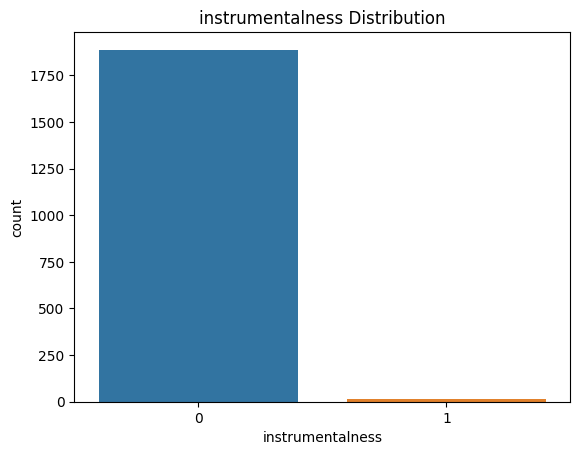

In [13]:
sns.countplot(data=Raw_data_df, x ="mood")
plt.title("Mood Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="liveness")
plt.title("Liveness Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="explicit")
plt.title("Explicit Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="mode")
plt.title("Mode Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="time_signature")
plt.title("time_signature Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="speechiness")
plt.title("speechiness Distribution")
plt.show();

sns.countplot(data=Raw_data_df, x ="instrumentalness")
plt.title("instrumentalness Distribution")
plt.show();

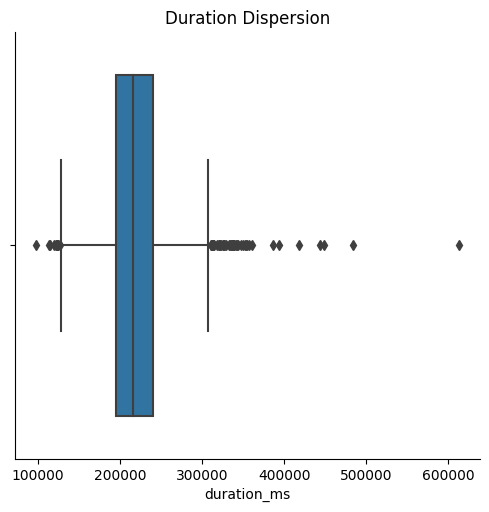

In [8]:
sns.catplot(data=Raw_data_df, x="duration_ms", kind='box')
plt.title("Duration Dispersion")
plt.show();